In [1]:
import detectron2
import cv2
from matplotlib import pyplot as plt
import os
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
import random
from detectron2.utils.visualizer import Visualizer


** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [2]:
detectron2.data.datasets.register_coco_instances("wires", {}, "./mydata/coco.json", "./mydata/images")
wires_metadata = detectron2.data.MetadataCatalog.get("wires")
dataset_dicts = detectron2.data.DatasetCatalog.get("wires")

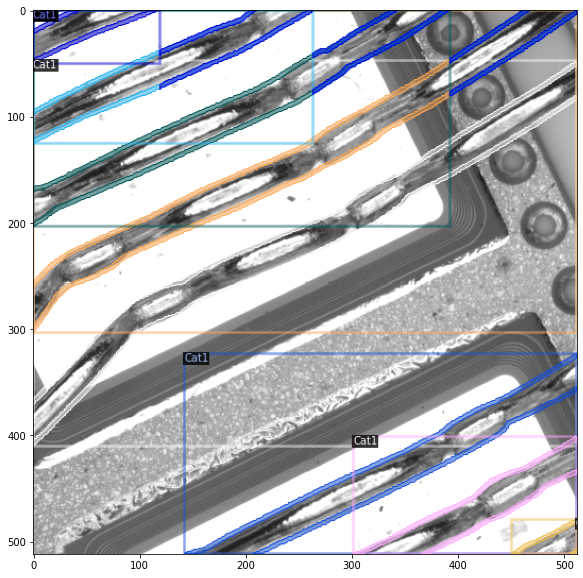

In [3]:
i = 2
d = dataset_dicts[i]
img = cv2.imread(d["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=wires_metadata, scale=1)
vis = visualizer.draw_dataset_dict(d)
a = vis.get_image()[:, :, ::-1]
plt.figure(figsize=(10,10));
plt.imshow(a)

In [4]:

cfg = get_cfg()
cfg.merge_from_file(
    "./configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)

In [5]:
cfg.DATASETS.TRAIN = ("wires")
cfg.DATASETS.TEST = ()  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
#cfg.MODEL.WEIGHTS = "output/saved1.pth"
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.02  # learning rate, default 0.02
cfg.SOLVER.MAX_ITER = (
    1300
)  # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = (
    128
)  # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # 3 classes (data, fig, hazelnut)
cfg.INPUT.MASK_FORMAT='bitmask' # use RLE instead of polygon
cfg.INPUT.MIN_SIZE_TRAIN = (200, 300, 400, 500)

In [6]:
cfg.DATALOADER

CfgNode({'NUM_WORKERS': 4, 'ASPECT_RATIO_GROUPING': True, 'SAMPLER_TRAIN': 'TrainingSampler', 'REPEAT_THRESHOLD': 0.0, 'FILTER_EMPTY_ANNOTATIONS': True})

In [7]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.optimizer


[01/14 15:17:47 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[01/14 15:17:47 d2.data.datasets.coco]: Loaded 46 images in COCO format from ./mydata/coco.json
[01/14 15:17:47 d2.data.build]: Removed 0 images with no usable annotations. 46 images left.
[01/14 15:17:47 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|    Cat1    | 328          |
|            |              |
[01/14 15:17:47 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(200, 300, 400, 500), max_size=1333, sample_style='choice'), RandomFlip()]
[01/14 15:17:47 d2.data.build]: Using training sampler TrainingSampler
[01/14 15:17:47 d2.data.common]: Serializing 46 elements to byte tensors and concatenating them all ...
[01/14 15:17:47 d2.data.common]: Serialized dataset takes 0.53 MiB


Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (12, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (12,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (3, 256, 1, 1) 

SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.02
    lr: 2e-05
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 1
    dampening: 0
    initial_lr: 0.02
    lr: 2e-05
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 2
    dampening: 0
    initial_lr: 0.02
    lr: 2e-05
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 3
    dampening: 0
    initial_lr: 0.02
    lr: 2e-05
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 4
    dampening: 0
    initial_lr: 0.02
    lr: 2e-05
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 5
    dampening: 0
    initial_lr: 0.02
    lr: 2e-05
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 6
    dampening: 0
    initial_lr: 0.02
    lr: 2e-05
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 7
    dampening: 0
    initial_lr: 0.02


In [8]:
trainer.optimizer

SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.02
    lr: 2e-05
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 1
    dampening: 0
    initial_lr: 0.02
    lr: 2e-05
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 2
    dampening: 0
    initial_lr: 0.02
    lr: 2e-05
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 3
    dampening: 0
    initial_lr: 0.02
    lr: 2e-05
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 4
    dampening: 0
    initial_lr: 0.02
    lr: 2e-05
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 5
    dampening: 0
    initial_lr: 0.02
    lr: 2e-05
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 6
    dampening: 0
    initial_lr: 0.02
    lr: 2e-05
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 7
    dampening: 0
    initial_lr: 0.02


In [9]:
trainer.train()

[01/14 15:17:53 d2.engine.train_loop]: Starting training from iteration 0
[01/14 15:18:04 d2.utils.events]:  eta: 0:07:53  iter: 19  total_loss: 3.114  loss_cls: 0.9458  loss_box_reg: 0.967  loss_mask: 0.6149  loss_rpn_cls: 0.4165  loss_rpn_loc: 0.2226  time: 0.3681  data_time: 0.1232  lr: 0.00039962  max_mem: 1925M
[01/14 15:18:11 d2.utils.events]:  eta: 0:07:58  iter: 39  total_loss: 1.674  loss_cls: 0.2919  loss_box_reg: 0.9168  loss_mask: 0.2416  loss_rpn_cls: 0.07906  loss_rpn_loc: 0.1135  time: 0.3675  data_time: 0.0018  lr: 0.00079922  max_mem: 1934M
[01/14 15:18:19 d2.utils.events]:  eta: 0:07:48  iter: 59  total_loss: 1.243  loss_cls: 0.1839  loss_box_reg: 0.6512  loss_mask: 0.226  loss_rpn_cls: 0.05059  loss_rpn_loc: 0.1083  time: 0.3678  data_time: 0.0019  lr: 0.0011988  max_mem: 1934M
[01/14 15:18:26 d2.utils.events]:  eta: 0:07:40  iter: 79  total_loss: 1.13  loss_cls: 0.1652  loss_box_reg: 0.5196  loss_mask: 0.194  loss_rpn_cls: 0.02989  loss_rpn_loc: 0.15  time: 0.3644  

[01/14 15:21:54 d2.utils.events]:  eta: 0:03:51  iter: 659  total_loss: 0.7622  loss_cls: 0.1031  loss_box_reg: 0.3784  loss_mask: 0.129  loss_rpn_cls: 0.01708  loss_rpn_loc: 0.1485  time: 0.3601  data_time: 0.0018  lr: 0.013187  max_mem: 1949M
[01/14 15:22:02 d2.utils.events]:  eta: 0:03:44  iter: 679  total_loss: 0.7044  loss_cls: 0.1115  loss_box_reg: 0.3691  loss_mask: 0.1118  loss_rpn_cls: 0.01391  loss_rpn_loc: 0.1143  time: 0.3602  data_time: 0.0018  lr: 0.013586  max_mem: 1949M
[01/14 15:22:09 d2.utils.events]:  eta: 0:03:37  iter: 699  total_loss: 0.6941  loss_cls: 0.1018  loss_box_reg: 0.3588  loss_mask: 0.1194  loss_rpn_cls: 0.01523  loss_rpn_loc: 0.1211  time: 0.3605  data_time: 0.0019  lr: 0.013986  max_mem: 1949M
[01/14 15:22:16 d2.utils.events]:  eta: 0:03:30  iter: 719  total_loss: 0.6956  loss_cls: 0.08576  loss_box_reg: 0.3629  loss_mask: 0.1211  loss_rpn_cls: 0.02318  loss_rpn_loc: 0.11  time: 0.3605  data_time: 0.0018  lr: 0.014386  max_mem: 1949M
[01/14 15:22:24 d2

[01/14 15:25:50 d2.engine.hooks]: Overall training speed: 1298 iterations in 0:07:51 (0.3631 s / it)
[01/14 15:25:50 d2.engine.hooks]: Total training time: 0:07:52 (0:00:01 on hooks)


In [10]:
#cfg = get_cfg()
#cfg.merge_from_file(
#    "./configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
#)
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.75   # set the testing threshold for this model
cfg.DATASETS.TEST = ("wires", )
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # 3 classes (data, fig, hazelnut)

predictor = detectron2.engine.defaults.DefaultPredictor(cfg)

0.019004106521606445,0.11602592468261719


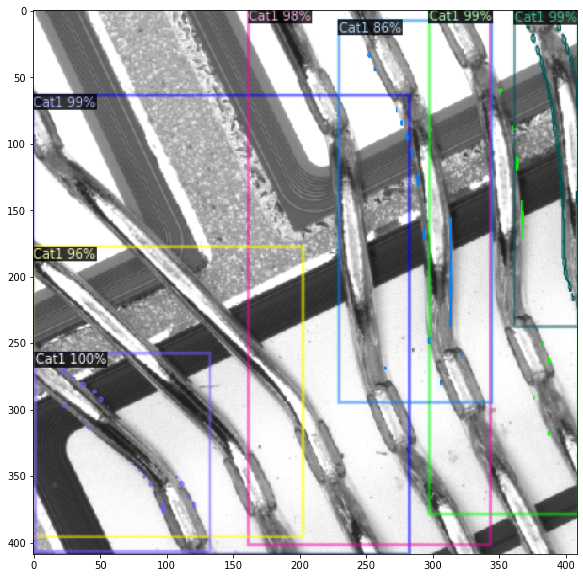

In [13]:
from detectron2.utils.visualizer import ColorMode
import time
plt.figure(figsize=(10,10))
for d in random.sample(dataset_dicts, 1):    
    im = cv2.imread(d["file_name"])
#im = cv2.imread('mydata/images/0025.png')
    t0 = time.time()
    outputs, tmp = predictor(im)
    t1 = time.time()
    v = Visualizer(im[:, :, ::-1],
                   metadata=wires_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    t2 = time.time()
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    a = v.get_image()[:, :, ::-1]
    plt.imshow(a)
    print(f'{t2-t1},{t1-t0}')